"""P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib"""





# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of different algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Ensure Reproducibility
np.random.seed(10)

In [3]:
# Read csv
data = pd.read_csv('winequality.csv')

# view the head
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [5]:
# describing our data

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# checking the complete summary of our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Analysising the dataset to see if there are missing variables present

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# From the code above we noticed that

- All the columns contain numerical variables (floating point numbers and integers)
- There are therefore no categorical columns present
- There are also no missing variables present so we proceed to the next step.

## Feature Engineering

In [8]:
def status(x):
    if x < 5:
        return 0
    elif x >= 5 and x < 7:
        return 1
    else:
        return 2
    
def status2(x):
    if x < 7:
        return 0
    else:
        return 1
    
data['quality1'] = data['quality'].apply(status) # splitting the wine into bad, average and good quality
data['quality2'] = data['quality'].apply(status2) # splitting the wine into bad and good quality 

# Exploratory Data Analysis

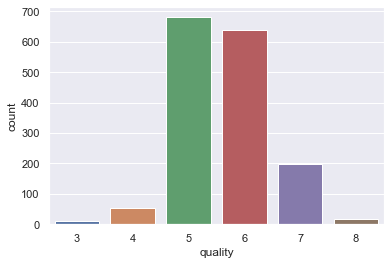

In [9]:
# Our label Distribution (countplot)
sns.countplot(data['quality'])

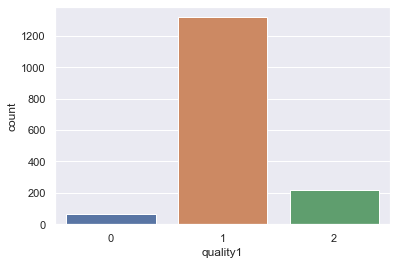

In [10]:
sns.countplot(data['quality1'])

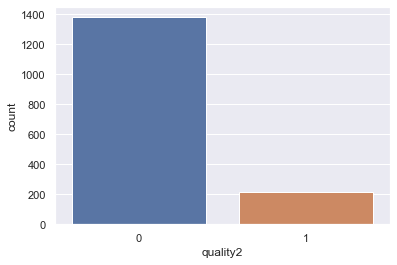

In [11]:
sns.countplot(data['quality2'])

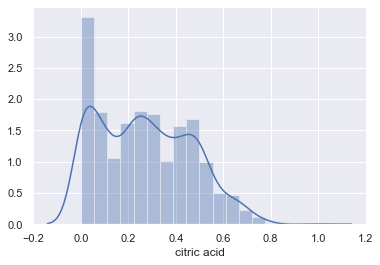

In [12]:
# Example EDA (distplot)
sns.distplot(data['citric acid'])

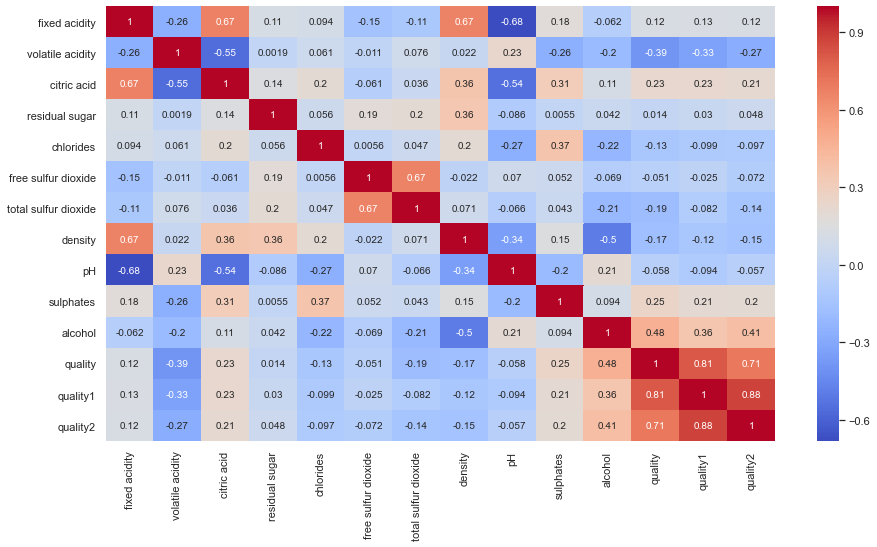

In [13]:
# heatmap of the entire dataset
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

<Figure size 1080x720 with 0 Axes>

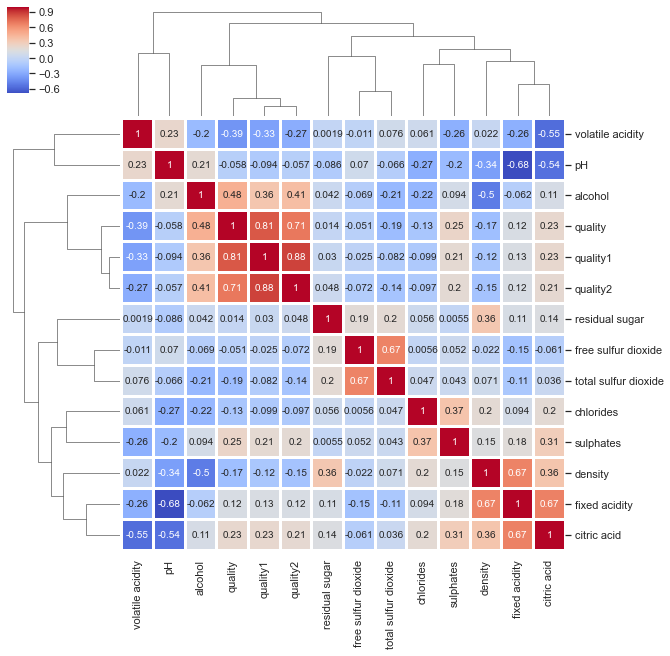

In [22]:
plt.figure(figsize=(15,10))
sns.clustermap(data.corr(), linewidth=2, cmap='coolwarm', annot=True)

In [23]:
# checking the correlation of the columns to quality feature

data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
quality1                0.812367
quality2                0.710196
Name: quality, dtype: float64

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
quality1                      AxesSubplot(0.125,0.125;0.168478x0.16413)
quality2                   AxesSubplot(0.327174,0.125;0.168478x0

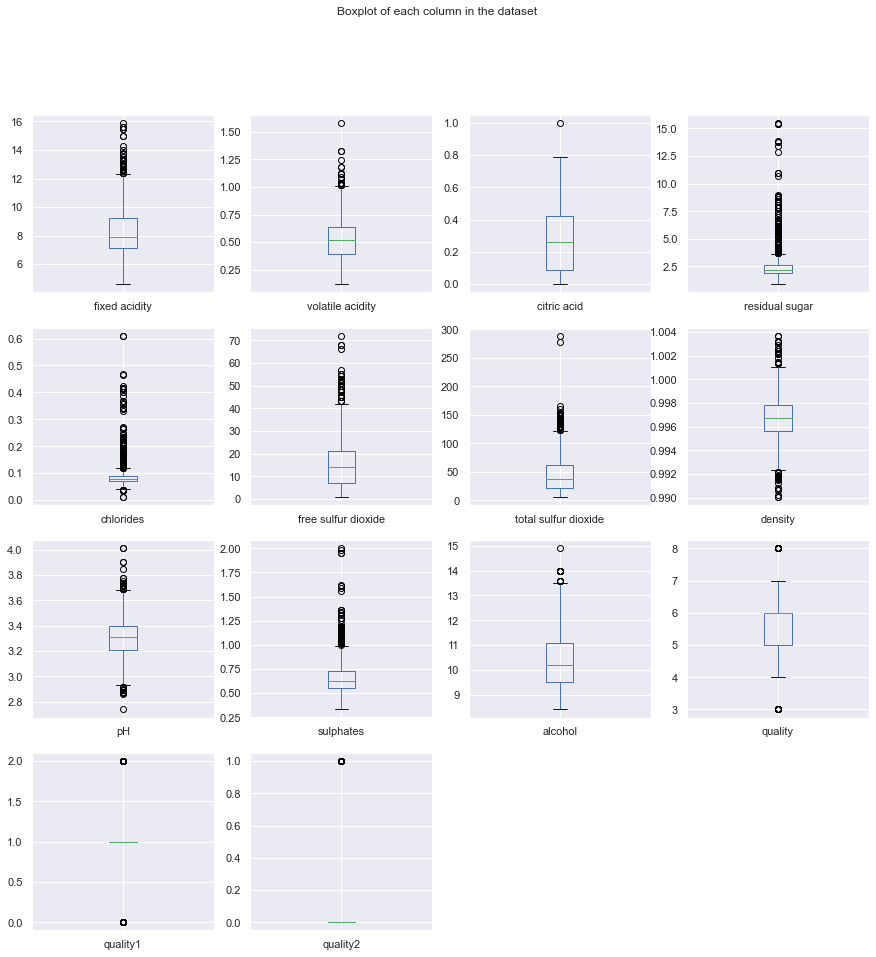

In [17]:
# box plot of the entire dataset to check for outliers

data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(15, 15), title='Boxplot of each column in the dataset')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022099315DC8>,
      dtype=object)

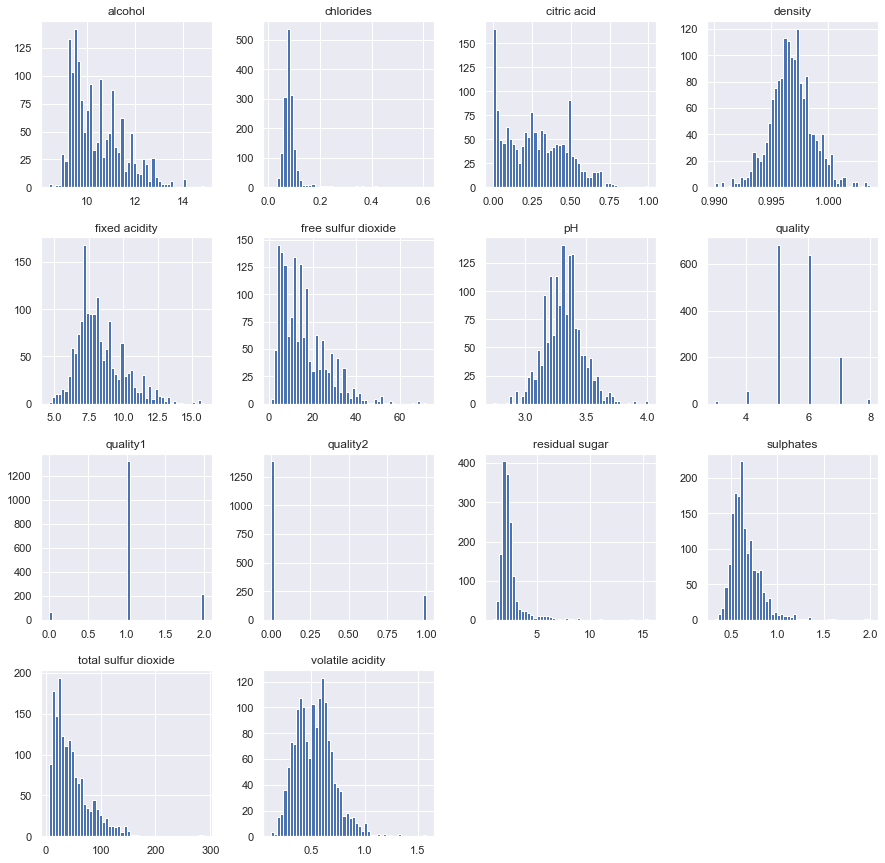

In [18]:
# distplot of the entire dataset to know how to scale each feature

data.hist(bins=50, figsize=(15,15))

# Things i noticed

- The most of the columns contain a lot of outliers
- The heatmap showed that some of the columns exhibited qualities of multicolinearity namely (total and free sulphur dioxide)
- Fixed acidity also showed strong similiarities to both density and citric acid
- Alcohol showed the strongest positive correlation to quality while volatile acidity showed the strongest neagative correlation

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [18]:
# checking to see if there are any duplicate features present

data.duplicated().sum()

240

In [19]:
data[data.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5


In [20]:
pd.DataFrame({'variance': data.var()}, index=data.columns)

,variance
fixed acidity,3.031416
volatile acidity,0.032062
citric acid,0.037947
residual sugar,1.987897
chlorides,0.002215
free sulfur dioxide,109.414884
total sulfur dioxide,1082.102373
density,0.000004
pH,0.023835
sulphates,0.028733


## For the processing, 
- There are 240 duplicate rows in the dataset, we would need to drop them
- Since the the majority of the features have a lot of outliers scaling might be needed 
- Due to the multi-colinearity present we need to generate new features and drop some
- total and free sulphur dioxide have very high variance
- No obvious relationship between listed wine properties and their quality value
- Slight inverse relationship with quality: volatile acidity, *Minor: total suplhur dioxide, density.
- Slight direct relationship with quality: alcholol, *Minor: sulphates, citric acid.
- most obvious relationship: alcohol(direct)
- Classes are indeed ordered but unbalanced
- greater than 75 percent of the tested samples had a quality value of 6 or less which is less than 6.5
- No missing or Nan Values
- All the columns contain only numerical data types
- No negative values was present in any column

In [24]:
# dropping duplicated rows

data.drop_duplicates(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 14 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
quality1                1359 non-null int64
quality2                1359 non-null int64
dtypes: float64(11), int64(3)
memory usage: 159.3 KB


## Feature Selection and Engineering

In [26]:
# drop useless features

#data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']
#data['other acid'] = data['fixed acidity'] - data['citric acid']
#data['new1'] = data['alcohol'] * data['pH']
#data['new2'] = data['alcohol'] * data['density']
#data['new3'] = data['alcohol'] * data['free sulfur dioxide']

# drop some features
#data.drop(['pH', 'citric acid', 'density', 'free sulfur dioxide'], axis=1, inplace=True)

## Feature Extraction - Dimensionality Reduction

Text(0, 0.5, 'Second Principle Component')

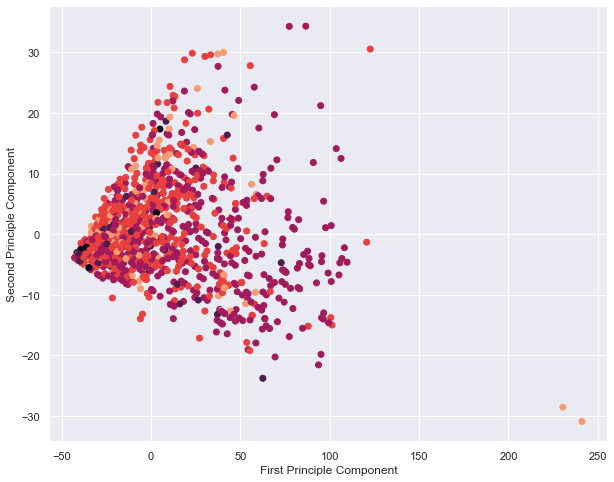

In [27]:
from sklearn.decomposition import PCA

pca = PCA(random_state=10, n_components=2)
x_pca = data.drop(['quality', 'quality1', 'quality2'], axis=1).copy()
x_pca = pca.fit_transform(x_pca)

# visualizing our data

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['quality'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [28]:
# determining the best number of components

pca.explained_variance_ratio_

array([0.9481314 , 0.04704536])

## Binning the features

In [29]:
# Binning 5 features

def alcohol(x):
    if x <=9.0:
        return 1.0
    elif x > 9.0 and x <= 10.0:
        return 2
    elif x > 10.0 and x <= 11.0:
        return 3.0
    elif x > 11.0 and x <= 12.0:
        return 4.0
    elif x > 12.0 and x <= 13.0:
        return 5.0
    elif x > 13.0:
        return 6.0

def chlorides(x):
    if x <= 0.1:
        return 1.0
    elif x > 0.1 and x <= 0.2:
        return 2
    elif x > 0.2 and x <= 0.3:
        return 3.0
    elif x > 0.3 and x <= 0.4:
        return 4.0
    elif x > 0.4 and x <= 0.5:
        return 5.0
    elif x > 0.5:
        return 6.0
    
def fixed_acidity(x):
    if x <=6.0:
        return 1.0
    elif x > 6.0 and x <= 8.0:
        return 2
    elif x > 8.0 and x <= 10.0:
        return 3.0
    elif x > 10.0 and x <= 12.0:
        return 4.0
    elif x > 12.0 and x <= 14.0:
        return 5.0
    elif x > 14.0:
        return 6.0
    
def total_sulfur_dioxide(x):
    if x <=50.0:
        return 1.0
    elif x > 50.0 and x <= 100.0:
        return 2
    elif x > 100.0 and x <= 150.0:
        return 3.0
    elif x > 150.0 and x <= 200.0:
        return 4.0
    elif x > 200.0 and x <= 250.0:
        return 5.0
    elif x > 250.0:
        return 6.0

def volatile_acidity(x):
    if x <= 0.25:
        return 1.0
    elif x > 0.25 and x <= 0.50:
        return 2
    elif x > 0.50 and x <= 0.75:
        return 3.0
    elif x > 0.75 and x <= 1.0:
        return 4.0
    elif x > 1.0 and x <= 1.25:
        return 5.0
    elif x > 1.25:
        return 6.0

def citric_acid(x):
    if x <=0.2:
        return 1.0
    elif x > 0.2 and x <= 0.4:
        return 2
    elif x > 0.4 and x <= 0.6:
        return 3.0
    elif x > 0.6 and x <= 0.8:
        return 4.0
    elif x > 0.8 :
        return 5.0

data['alcohol'] = data['alcohol'].apply(alcohol)
#data['citric acid'] = data['citric acid'].apply(citric_acid)
#data['fixed acidity'] = data['fixed acidity'].apply(fixed_acidity)
#data['chlorides'] = data[chlorides].apply(chlorides)
#data['volatile acidity'] = data['volatile acidity'].apply(volatile_acidity)
#data['total sulfur dioxide'] = data['total sulfur dioxide'].apply(total_sulfur_dioxide)
#data['residual sugar'] = data['residual sugar'].apply(residual_sugar)

## Spliting our dataset

In [45]:
X = data.drop(['quality', 'quality1', 'quality2'], axis=1).copy()
X1 = data.drop(['quality', 'quality1', 'quality2'], axis=1).copy()
X2 = data.drop(['quality', 'quality1', 'quality2'], axis=1).copy()

y = data['quality'].copy()
y1 = data['quality1'].copy()
y2 = data['quality2'].copy()

print(X.shape, y.shape, y1.shape, y2.shape)

(1359, 11) (1359,) (1359,) (1359,)


## Scaling our data

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler gave better results

X = StandardScaler().fit_transform(X)
X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)

## Carrying out Smote over sampling to battle the imbalanced nature of our data

In [47]:
# SMOTE Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)

X, y = smote.fit_sample(X, y)
X1, y1 = smote.fit_sample(X1, y1)
X2, y2 = smote.fit_sample(X2, y2)

print(X.shape, y.shape)
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)

(3462, 11) (3462,)
(3336, 11) (3336,)
(2350, 11) (2350,)


## Splitting with Stratified shuffle split

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=10)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
for train_index, test_index in ss.split(X1, y1):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train1, y_test1 = y1.iloc[train_index], y1.iloc[test_index]
    

for train_index, test_index in ss.split(X2, y2):
    X_train2, X_test2 = X2[train_index], X2[test_index]
    y_train2, y_test2 = y2.iloc[train_index], y2.iloc[test_index]

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [50]:
# importing our models and metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## First we would try out our model without scaling the features

### Random Forest classifier

              precision    recall  f1-score   support

           3       0.99      0.98      0.99       175
           4       0.96      0.90      0.93       186
           5       0.65      0.71      0.68       157
           6       0.59      0.67      0.63       153
           7       0.93      0.85      0.89       190
           8       1.00      0.97      0.99       178

    accuracy                           0.85      1039
   macro avg       0.85      0.85      0.85      1039
weighted avg       0.87      0.85      0.86      1039
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8536033043208646
Train Accuracy:  1.0
Accuracy:  0.8537054860442733
Recall:  0.8466712669133211
F1 Score:  0.8489409337017534


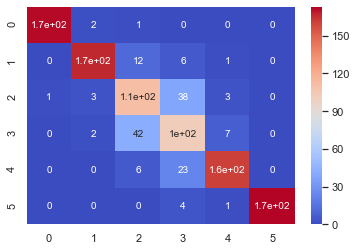

In [82]:
rf = RandomForestClassifier(n_estimators=100,
                       random_state=10)
rf.fit(X_train, y_train)
pred3 = rf.predict(X_test)
pred3t = rf.predict(X_train)

print(classification_report(pred3, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred3, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred3, y_test, average='macro'))
print('Train Accuracy: ', accuracy_score(pred3t, y_train))
print('Accuracy: ', accuracy_score(pred3, y_test))
print('Recall: ', recall_score(pred3, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred3, y_test, average= 'macro'))

In [55]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [56]:
# Checking the importance of features

pd.DataFrame([data.columns, rf.feature_importances_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality1,quality2
1,0.0660273,0.14061,0.080528,0.0709214,0.0965639,0.0656616,0.0921242,0.0704453,0.0749206,0.12285,0.119348,None,None,None


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       349
           1       0.84      0.93      0.88       302
           2       0.95      0.90      0.92       350

    accuracy                           0.93      1001
   macro avg       0.93      0.93      0.93      1001
weighted avg       0.93      0.93      0.93      1001
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9261387135638633
Train Accuracy:  1.0
Accuracy:  0.926073926073926
Recall:  0.9262931527570325
F1 Score:  0.9251221141377145


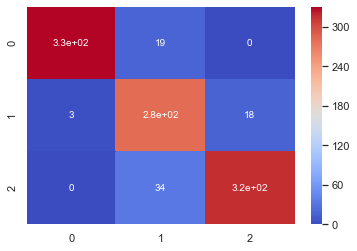

In [81]:
# Quality1

rf1 = RandomForestClassifier(n_estimators=100,
                       random_state=10)
rf1.fit(X_train1, y_train1)
pred31 = rf1.predict(X_test1)
pred3t1 = rf1.predict(X_train1)

print(classification_report(pred31, y_test1), '\n')
print(sns.heatmap(confusion_matrix(pred31, y_test1), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred31, y_test1, average='macro'))
print('Train Accuracy: ', accuracy_score(pred3t1, y_train1))
print('Accuracy: ', accuracy_score(pred31, y_test1))
print('Recall: ', recall_score(pred31, y_test1, average= 'macro'))
print('F1 Score: ', f1_score(pred31, y_test1, average= 'macro'))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       330
           1       0.96      0.90      0.93       375

    accuracy                           0.93       705
   macro avg       0.93      0.93      0.93       705
weighted avg       0.93      0.93      0.93       705
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9603399433427762
Train Accuracy:  1.0
Accuracy:  0.9290780141843972
Recall:  0.904
F1 Score:  0.9313186813186813


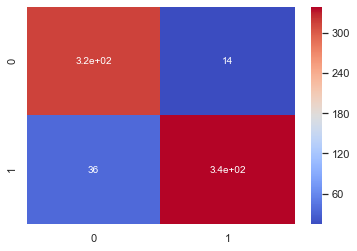

In [83]:
# Quality2

rf2 = RandomForestClassifier(n_estimators=100,
                       random_state=10)
rf2.fit(X_train2, y_train2)
pred32 = rf2.predict(X_test2)
pred3t2 = rf2.predict(X_train2)

print(classification_report(pred32, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred32, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred32, y_test2))
print('Train Accuracy: ', accuracy_score(pred3t2, y_train2))
print('Accuracy: ', accuracy_score(pred32, y_test2))
print('Recall: ', recall_score(pred32, y_test2))
print('F1 Score: ', f1_score(pred32, y_test2))

### SVC Classifier

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       173
           4       0.96      0.95      0.95       176
           5       0.68      0.67      0.68       175
           6       0.62      0.66      0.64       163
           7       0.90      0.89      0.89       176
           8       1.00      0.98      0.99       176

    accuracy                           0.86      1039
   macro avg       0.86      0.86      0.86      1039
weighted avg       0.86      0.86      0.86      1039
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8613104334152769
Accuracy:  0.861405197305101
Recall:  0.8591740365973495
F1 Score:  0.8601150993612213


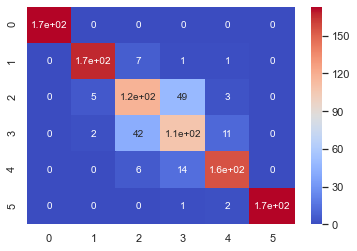

In [78]:
svc = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)

print(classification_report(pred4, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred4, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred4, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred4, y_test))
print('Recall: ', recall_score(pred4, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred4, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       343
           1       0.88      0.93      0.91       316
           2       0.94      0.92      0.93       342

    accuracy                           0.94      1001
   macro avg       0.94      0.94      0.94      1001
weighted avg       0.94      0.94      0.94      1001
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9401137664610718
Accuracy:  0.9400599400599401
Recall:  0.9398705042119637
F1 Score:  0.939644970414201


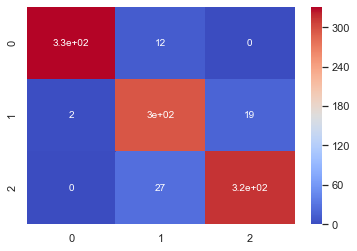

In [79]:
# Quality1

svc1 = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc1.fit(X_train1, y_train1)
pred41 = svc1.predict(X_test1)

print(classification_report(pred41, y_test1), '\n')
print(sns.heatmap(confusion_matrix(pred41, y_test1), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred41, y_test1, average='macro'))
print('Accuracy: ', accuracy_score(pred41, y_test1))
print('Recall: ', recall_score(pred41, y_test1, average= 'macro'))
print('F1 Score: ', f1_score(pred41, y_test1, average= 'macro'))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       343
           1       0.96      0.93      0.95       362

    accuracy                           0.94       705
   macro avg       0.94      0.94      0.94       705
weighted avg       0.95      0.94      0.94       705
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9575070821529745
Accuracy:  0.9446808510638298
Recall:  0.9337016574585635
F1 Score:  0.9454545454545454


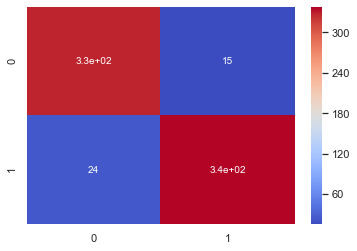

In [80]:
# Quality2

svc2 = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc2.fit(X_train2, y_train2)
pred42 = svc2.predict(X_test2)

print(classification_report(pred42, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred42, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred42, y_test2))
print('Accuracy: ', accuracy_score(pred42, y_test2))
print('Recall: ', recall_score(pred42, y_test2))
print('F1 Score: ', f1_score(pred42, y_test2))

### SGD classifier

              precision    recall  f1-score   support

           3       1.00      0.73      0.85       236
           4       0.40      0.53      0.45       130
           5       0.65      0.50      0.56       228
           6       0.17      0.38      0.23        77
           7       0.42      0.51      0.46       144
           8       0.79      0.61      0.69       224

    accuracy                           0.57      1039
   macro avg       0.57      0.54      0.54      1039
weighted avg       0.66      0.57      0.60      1039
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.5709089097069963
Accuracy:  0.5707410972088547
Recall:  0.5416907985875425
F1 Score:  0.5402017539037937


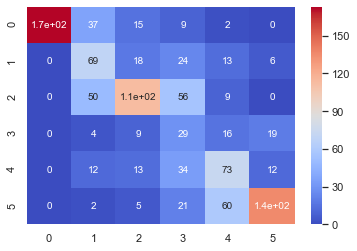

In [62]:
sgd = SGDClassifier(random_state=10)
sgd.fit(X_train, y_train)
pred5 = sgd.predict(X_test)

print(classification_report(pred5, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred5, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred5, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred5, y_test))
print('Recall: ', recall_score(pred5, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred5, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       409
           1       0.50      0.73      0.59       231
           2       0.84      0.78      0.81       361

    accuracy                           0.74      1001
   macro avg       0.74      0.74      0.73      1001
weighted avg       0.77      0.74      0.75      1001
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.736395077712443
Accuracy:  0.7362637362637363
Recall:  0.7364991543211511
F1 Score:  0.726473800803357


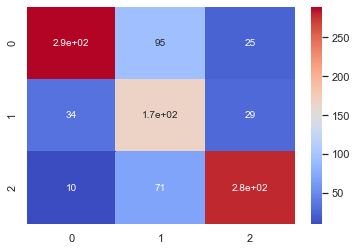

In [63]:
# Quality 1

sgd1 = SGDClassifier(random_state=10)
sgd1.fit(X_train1, y_train1)
pred51 = sgd1.predict(X_test1)

print(classification_report(pred51, y_test1), '\n')
print(sns.heatmap(confusion_matrix(pred51, y_test1), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred51, y_test1, average='macro'))
print('Accuracy: ', accuracy_score(pred51, y_test1))
print('Recall: ', recall_score(pred51, y_test1, average= 'macro'))
print('F1 Score: ', f1_score(pred51, y_test1, average= 'macro'))

              precision    recall  f1-score   support

           0       0.66      0.86      0.74       271
           1       0.89      0.72      0.80       434

    accuracy                           0.77       705
   macro avg       0.77      0.79      0.77       705
weighted avg       0.80      0.77      0.78       705
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8895184135977338
Accuracy:  0.774468085106383
Recall:  0.7235023041474654
F1 Score:  0.7979669631512072


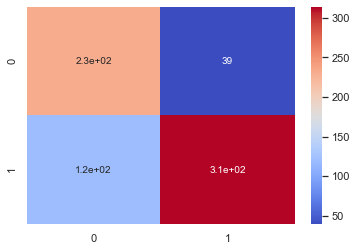

In [64]:
# Quality 2

sgd2 = SGDClassifier(random_state=10)
sgd2.fit(X_train2, y_train2)
pred52 = sgd2.predict(X_test2)

print(classification_report(pred52, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred52, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred52, y_test2))
print('Accuracy: ', accuracy_score(pred52, y_test2))
print('Recall: ', recall_score(pred52, y_test2))
print('F1 Score: ', f1_score(pred52, y_test2))

### Logistic Regresson Classifier

              precision    recall  f1-score   support

           3       1.00      0.79      0.88       218
           4       0.56      0.65      0.60       151
           5       0.55      0.57      0.56       166
           6       0.34      0.56      0.42       103
           7       0.47      0.47      0.47       175
           8       0.83      0.64      0.72       226

    accuracy                           0.63      1039
   macro avg       0.63      0.61      0.61      1039
weighted avg       0.67      0.63      0.64      1039
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.6256616393152171
Accuracy:  0.6256015399422522
Recall:  0.6139533545125487
F1 Score:  0.6103030199297264


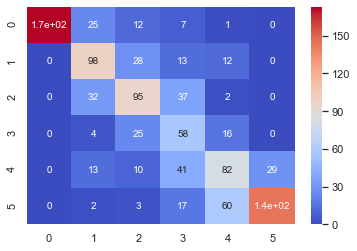

In [65]:
lg = LogisticRegression(random_state=10)
lg.fit(X_train, y_train)
pred6 = lg.predict(X_test)

print(classification_report(pred6, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred6, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred6, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred6, y_test))
print('Recall: ', recall_score(pred6, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred6, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       347
           1       0.57      0.66      0.62       290
           2       0.83      0.76      0.80       364

    accuracy                           0.73      1001
   macro avg       0.73      0.73      0.73      1001
weighted avg       0.74      0.73      0.74      1001
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.7313241385097672
Accuracy:  0.7312687312687313
Recall:  0.726949485639737
F1 Score:  0.7275114850877534


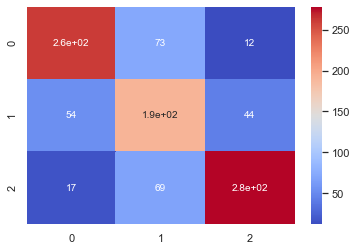

In [66]:
# Quality1

lg1 = LogisticRegression(random_state=10)
lg1.fit(X_train1, y_train1)
pred61 = lg1.predict(X_test1)

print(classification_report(pred61, y_test1), '\n')
print(sns.heatmap(confusion_matrix(pred61, y_test1), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred61, y_test1, average='macro'))
print('Accuracy: ', accuracy_score(pred61, y_test1))
print('Recall: ', recall_score(pred61, y_test1, average= 'macro'))
print('F1 Score: ', f1_score(pred61, y_test1, average= 'macro'))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       325
           1       0.85      0.79      0.82       380

    accuracy                           0.81       705
   macro avg       0.81      0.82      0.81       705
weighted avg       0.82      0.81      0.81       705
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8526912181303116
Accuracy:  0.8141843971631205
Recall:  0.7921052631578948
F1 Score:  0.8212824010914052


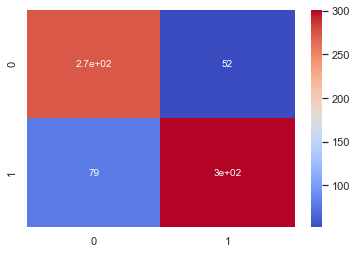

In [67]:
# Quality2

lg2 = LogisticRegression(random_state=10)
lg2.fit(X_train2, y_train2)
pred62 = lg2.predict(X_test2)

print(classification_report(pred62, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred62, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred62, y_test2))
print('Accuracy: ', accuracy_score(pred62, y_test2))
print('Recall: ', recall_score(pred62, y_test2))
print('F1 Score: ', f1_score(pred62, y_test2))

### XGBoost

              precision    recall  f1-score   support

           3       0.98      0.94      0.96       180
           4       0.85      0.81      0.83       182
           5       0.57      0.63      0.60       158
           6       0.45      0.55      0.49       139
           7       0.79      0.73      0.76       188
           8       0.98      0.88      0.93       192

    accuracy                           0.77      1039
   macro avg       0.77      0.76      0.76      1039
weighted avg       0.79      0.77      0.78      1039
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.7689300821650832
Accuracy:  0.7690086621751684
Recall:  0.7569244254462902
F1 Score:  0.7609624964036077


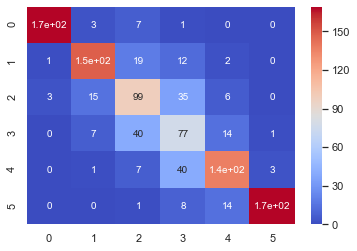

In [71]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred7 = xgb.predict(X_test)

print(classification_report(pred7, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred7, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred7, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred7, y_test))
print('Recall: ', recall_score(pred7, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred7, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       338
           1       0.76      0.82      0.79       311
           2       0.91      0.86      0.88       352

    accuracy                           0.86      1001
   macro avg       0.86      0.86      0.86      1001
weighted avg       0.87      0.86      0.86      1001
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8621915328502155
Accuracy:  0.8621378621378621
Recall:  0.861032669923036
F1 Score:  0.8610568359025882


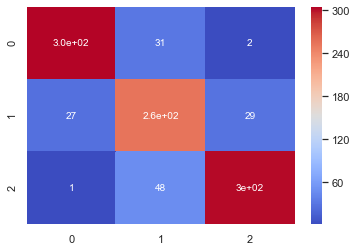

In [72]:
xgb1 = XGBClassifier(random_state=10)
xgb1.fit(X_train1, y_train1)
pred71 = xgb1.predict(X_test1)

print(classification_report(pred71, y_test1), '\n')
print(sns.heatmap(confusion_matrix(pred71, y_test1), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred71, y_test1, average='macro'))
print('Accuracy: ', accuracy_score(pred71, y_test1))
print('Recall: ', recall_score(pred71, y_test1, average= 'macro'))
print('F1 Score: ', f1_score(pred71, y_test1, average= 'macro'))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       326
           1       0.93      0.87      0.90       379

    accuracy                           0.90       705
   macro avg       0.89      0.90      0.89       705
weighted avg       0.90      0.90      0.90       705
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9320113314447592
Accuracy:  0.8950354609929078
Recall:  0.8680738786279684
F1 Score:  0.8989071038251366


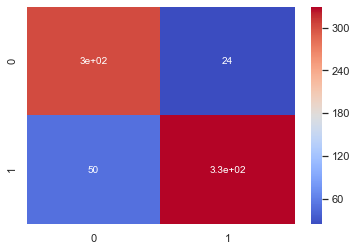

In [73]:
xgb2 = XGBClassifier(random_state=10)
xgb2.fit(X_train2, y_train2)
pred72 = xgb2.predict(X_test2)

print(classification_report(pred72, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred72, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred72, y_test2))
print('Accuracy: ', accuracy_score(pred72, y_test2))
print('Recall: ', recall_score(pred72, y_test2))
print('F1 Score: ', f1_score(pred72, y_test2))

## Hyper Parameter Tuning our Best Performing model - Random Forest Classifier

In [76]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
param = {'n_estimators': [1000], 'min_samples_split': [2, 3, 4]}

model = RandomForestClassifier(random_state=10, verbose=5)

grid = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, verbose=5)

In [65]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   34.0s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   41.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tre

building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tre

building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.1s finished


GridSearchCV(estimator=RandomForestClassifier(random_state=10, verbose=5),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [1000]},
             verbose=5)

In [66]:
grid.best_estimator_

RandomForestClassifier(n_estimators=1000, random_state=10, verbose=5)

## Cross Validation

In [84]:
cv_score = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=10), X, y, cv=10, n_jobs=-1)
cv_score1 = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=10), X1, y1, cv=10, n_jobs=-1)
cv_score2 = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=10), X2, y2, cv=10, n_jobs=-1)

cv_scorex = cross_val_score(SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf'), X, y, cv=10, n_jobs=-1)
cv_score1x = cross_val_score(SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf'), X1, y1, cv=10, n_jobs=-1)
cv_score2x = cross_val_score(SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf'), X2, y2, cv=10, n_jobs=-1)

print('Random Forest')
print(cv_score.mean())
print(cv_score1.mean())
print(cv_score2.mean())


print('')
print('SVC')

print(cv_scorex.mean())
print(cv_score1x.mean())
print(cv_score2x.mean())

Random Forest
0.8287126651230199
0.9214525903148656
0.9225531914893617

SVC
0.8359331012310307
0.9532277786768804
0.9612765957446809


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

# The best performing models are the SVC and Random Forest Classifier

The reason i choose random forests was because
- Precision and F1 scores were a priority expecially for wines rated 7, 8
- From a business perspective, it was imperative that our model was accuratly able to identify good quality wine (above 7 quality)
- We therefore needed to have as low number of False positives as possible
- Both models had the highest accuracy, f1, precision and recall scores accross board so it was obviously the best choice.

Also
- Our model was overfitting the data and generalizing poorly, the smote oversampling helped to improve the generalization on the test set
- Scaling the features helped to improve the performance of our model slightly by reducing the effect of outliers
- binning the alcohol feature helped to increase accuracy and precision slightly by one point
- feature engineering did not help to improve performance and also introduced multicolinearity
- feature selection helped us to get rid of the useless columns and multi colinearity in the dataset but slightly degraded performance by one point
- feature extration with PCA also reduced the performance of our model by one point
- Random forest has the capability to cope with noise and outliers in our dataset and it didnt need manual feature selection and extraction in this dataset
- Smote oversampling was a good contributor to performance, by counterating the imbalanced nature of our dataset it helped to increase performance on all the metrics by over 20 points

# We can improve our model by 
- Getting more effective and diverse data

# Summary

After careful evaluation of the dataset, visual plots and machine learning models, the six most influential physiochemical features that makes red wine good fall within:

    - Alcohol Percentage     (9.2 - 14.9)
    - Volatile Acidity       (0.12 - 0.915)
    - Sulphates              (0.39 - 2.00)
    - Total Sulfur dioxide   (6.0- 289.0)
    - Citric Acid            (0.0 - 1.00)
    - Chlorides              (0.012 - 0.358)

PH, Residual Sugars, Density and Fixed Acidity all have a large range across board so they won't really be helpful in pinpointing whether a wine is good or not.


Free Sulphur Dioxide is a subset of total sulphur dioxide.
    